In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

# Let's work on classifying fashion MNIST

In [2]:
# load the dataset (keras offers a functionality for this)
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (fashion_mnist.load_data())

# okay we need better names for that:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# get a validation set of size 5000
# use the train-test split of scikit-learn for that matter
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=5000, random_state=42)

# normalize input data to lie between 0 and 1
X_train = X_train/ 255.
X_val = X_val / 255.
X_test = X_test / 255.

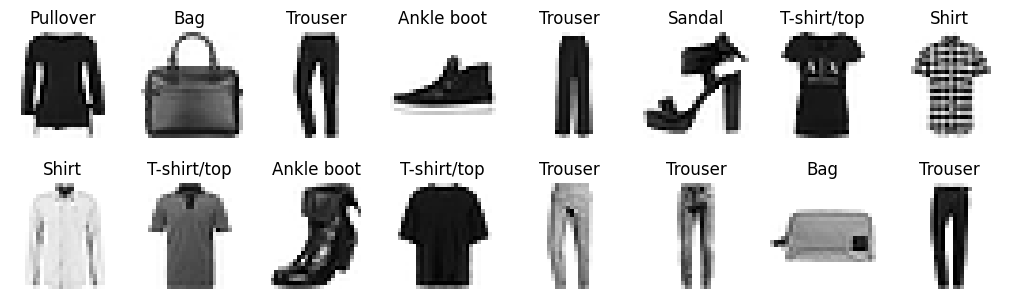

In [3]:
# Data visualization
n_rows = 2
n_cols = 8
plt.figure(figsize=(n_cols*1.6, n_rows*1.8))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])

plt.show()

# Feedforward Neural network in Keras
Now it's time to shine for the neural network powered by keras

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7089 - accuracy: 0.7697 - val_loss: 0.5276 - val_accuracy: 0.8170
Epoch 2/30
1719/1719 [================

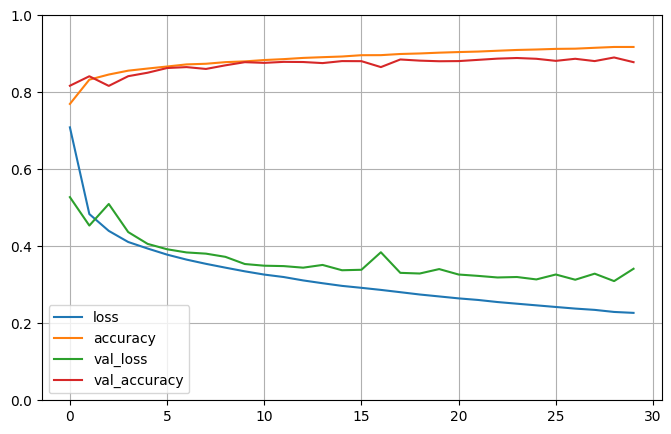

In [4]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, input_shape=[28*28], activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_ReLU = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
import pandas as pd

pd.DataFrame(history_ReLU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Compare ReLU activation to Sigmoid


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.9688 - accuracy: 0.4638 - val_loss: 1.5309 - val_accuracy: 0.5798
Epoch 2/30
1719/1719 [==============

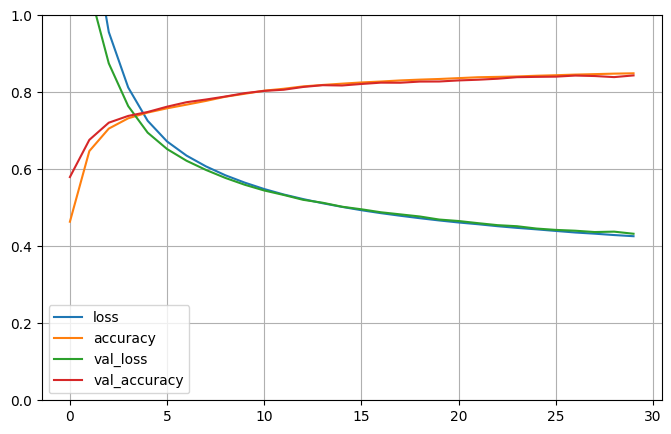

In [5]:
# TODO use sigmoid instead of relu
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, input_shape=[28*28], activation="sigmoid"))
model.add(keras.layers.Dense(100, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_sigmoid = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
pd.DataFrame(history_sigmoid.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# And now tanh

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6633 - accuracy: 0.7820 - val_loss: 0.5043 - val_accuracy: 0.8230
Epoch 2/30
1719/1719 [==============

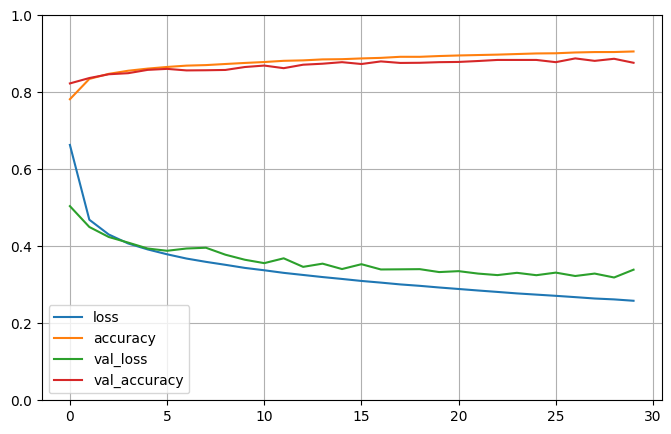

In [6]:
# TODO use tanh instead of relu
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, input_shape=[28*28], activation="tanh"))
model.add(keras.layers.Dense(100, activation="tanh"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_tanh = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
pd.DataFrame(history_tanh.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

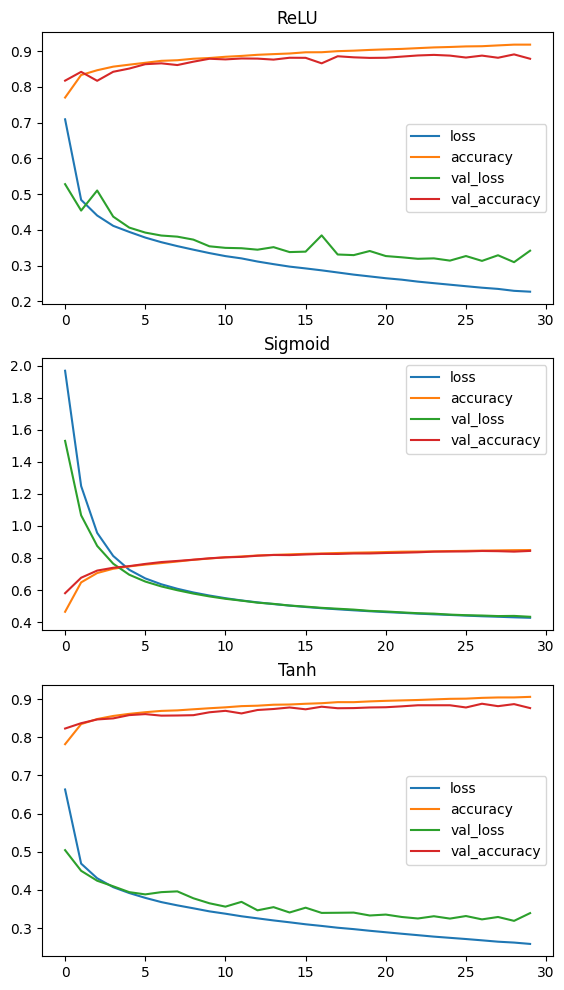

In [7]:
# Data visualization
n_rows = 3
n_cols = 1
histories = [[history_ReLU], [history_sigmoid], [history_tanh]]
titles = [["ReLU"], ["Sigmoid"], ["Tanh"]]

col_width = 6.6
row_height = 4
plt.figure(figsize=(n_cols*col_width, n_rows*row_height))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        ax = plt.subplot(n_rows, n_cols, index + 1)
        history = histories[row][col]
        title = titles[row][col]
        pd.DataFrame(history.history).plot(ax=ax)
        #plt.axis('off')
        plt.title(title)

plt.show()

# Different learning rates


### a=0.1

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 300)               235500    
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5324 - accuracy: 0.8067 - val_loss: 0.4087 - val_accuracy: 0.8504
Epoch 2/30
1719/1719 [==============

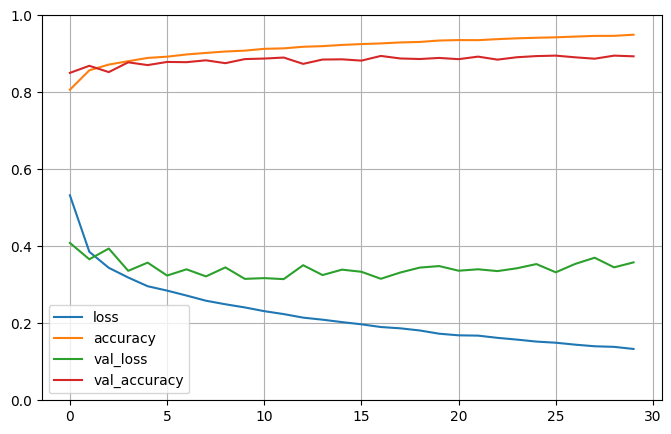

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, input_shape=[28*28], activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_tanh = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
pd.DataFrame(history_tanh.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### a=0.01

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7074 - accuracy: 0.7694 - val_loss: 0.5399 - val_accuracy: 0.8108
Epoch 2/30
1719/1719 [==============

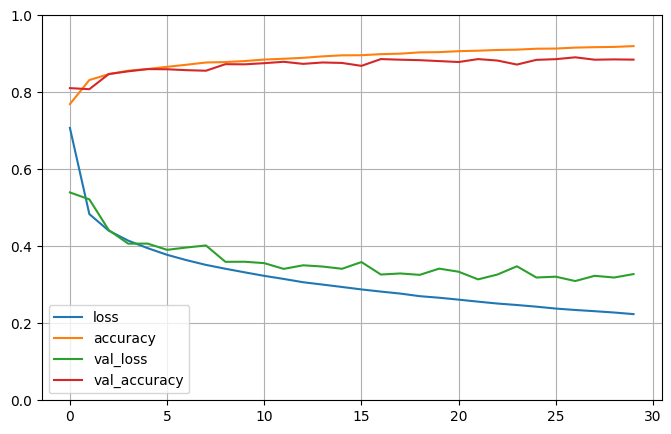

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, input_shape=[28*28], activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_tanh = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
pd.DataFrame(history_tanh.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### a = 0.001

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 300)               235500    
                                                                 
 dense_22 (Dense)            (None, 100)               30100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.4050 - accuracy: 0.5975 - val_loss: 0.9819 - val_accuracy: 0.6812
Epoch 2/30
1719/1719 [==============

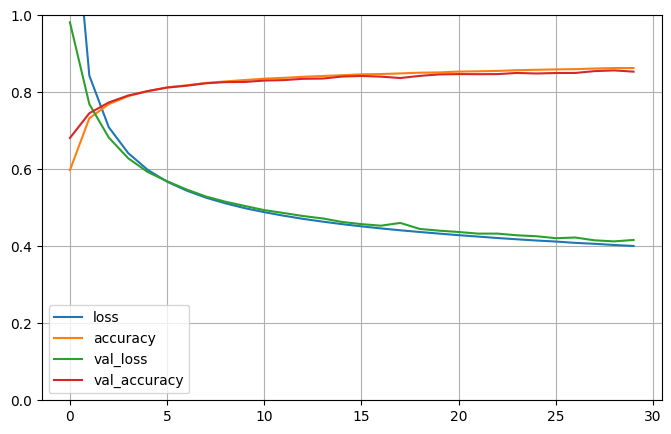

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, input_shape=[28*28], activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_tanh = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
pd.DataFrame(history_tanh.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Results: Best learning rate: 0.1, Best activation function: relu

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 300)               235500    
                                                                 
 dense_25 (Dense)            (None, 100)               30100     
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5320 - accuracy: 0.8068 - val_loss: 0.4137 - val_accuracy: 0.8452
Epoch 2/50
1719/1719 [==============

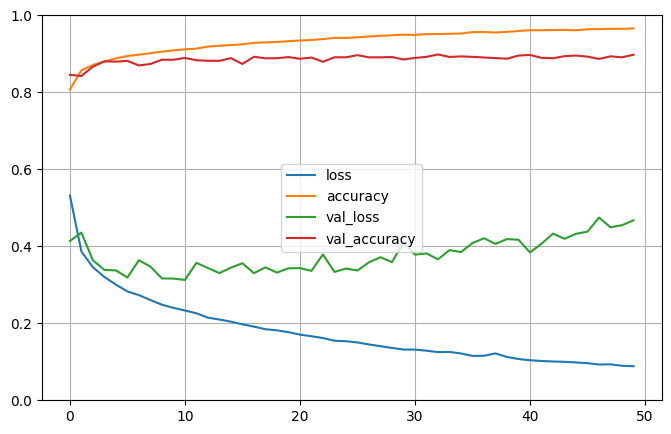

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, input_shape=[28*28], activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_tanh = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
pd.DataFrame(history_tanh.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.8893


[0.5050926208496094, 0.8892999887466431]

### Started to overfit

### Now with adam opt

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, input_shape=[28*28], activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_tanh = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
pd.DataFrame(history_tanh.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 300)               235500    
                                                                 
 dense_28 (Dense)            (None, 100)               30100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2392 - accuracy: 0.2715 - val_loss: 1.8162 - val_accuracy: 0.1958
Epoch 2/50
1719/1719 [==============

KeyboardInterrupt: 

Adam opt needs a very low learning rate due to how it works. a = 0.0001

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, input_shape=[28*28], activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history_tanh = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
pd.DataFrame(history_tanh.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()